In [1216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf

## EDA

### Data Summary

In [1217]:
restaurant_data = pd.read_csv("restaurant_data.csv")
restaurant_data.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [1218]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [1219]:
restaurant_data.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


### Missing Values

In [1220]:
restaurant_data.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

### Correlation Matrix for Predictors

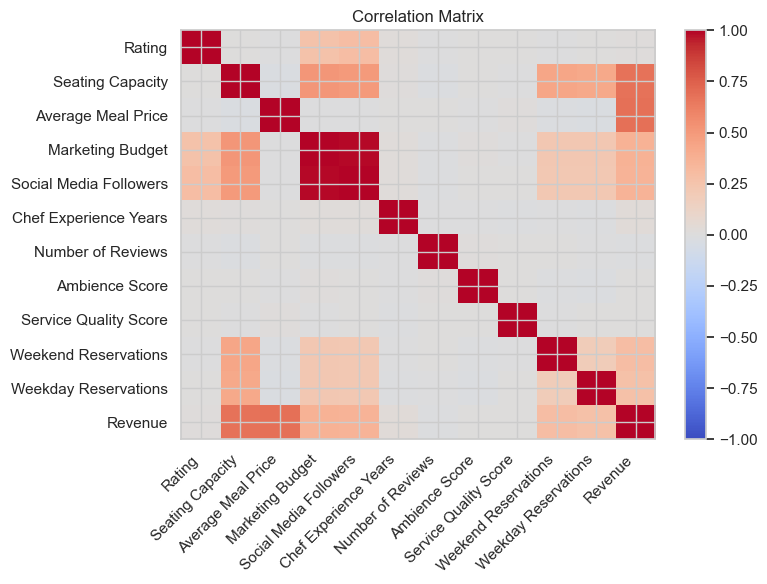

In [1221]:
cols = ['Rating','Seating Capacity','Average Meal Price','Marketing Budget','Social Media Followers','Chef Experience Years',
        'Number of Reviews','Ambience Score','Service Quality Score','Weekend Reservations','Weekday Reservations','Revenue']

correlation_matrix = restaurant_data[cols].corr()
response_corr = correlation_matrix['Revenue']

plt.figure(figsize=(8, 6)) 

plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto', vmin=-1, vmax=1)

plt.colorbar()

plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

From the correlation matrix, I think "Seating Capacity", "Average Meal Price", "Marketing Budget", and "Weekend Reservations" would be good predictors.

### Predictor Histograms

In [1222]:
df = restaurant_data.rename(columns={"Seating Capacity":"seating_capacity","Average Meal Price": "average_meal_price","Marketing Budget":"marketing_budget","Weekend Reservations":"weekend_reservations"
                                     ,"Parking Availability":"parking_availability","Location":"location","Number of Reviews":"number_of_reviews","Revenue":"revenue"
                                     ,"Service Quality Score":"service_quality_score","Ambience Score":"ambience_score","Social Media Followers":"social_media_followers"})
categorical_variables = ['parking_availability','location']
numerical_variables = ['seating_capacity','average_meal_price','marketing_budget','weekend_reservations','number_of_reviews','service_quality_score','ambience_score']

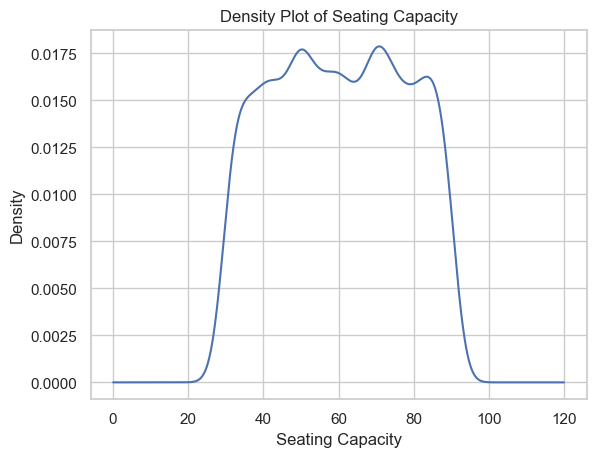

In [1223]:
df['seating_capacity'].plot(kind='kde')
plt.title('Density Plot of Seating Capacity')
plt.xlabel('Seating Capacity')
plt.show()

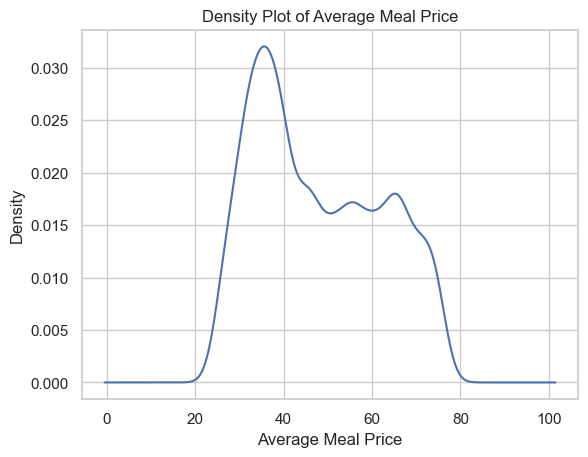

In [1224]:
df['average_meal_price'].plot(kind='kde')
plt.title('Density Plot of Average Meal Price')
plt.xlabel('Average Meal Price')
plt.show()

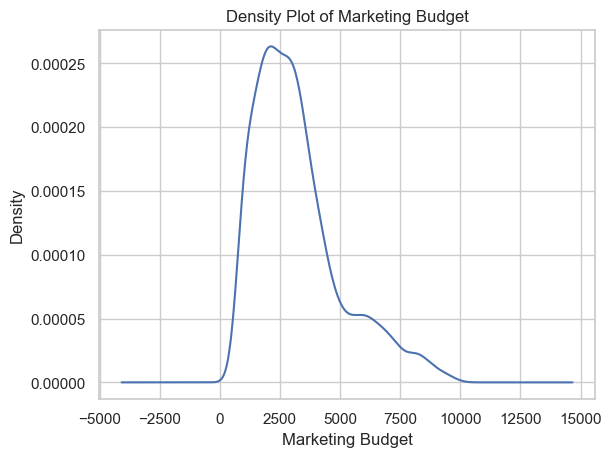

In [1225]:
df['marketing_budget'].plot(kind='kde')
plt.title('Density Plot of Marketing Budget')
plt.xlabel('Marketing Budget')
plt.show()

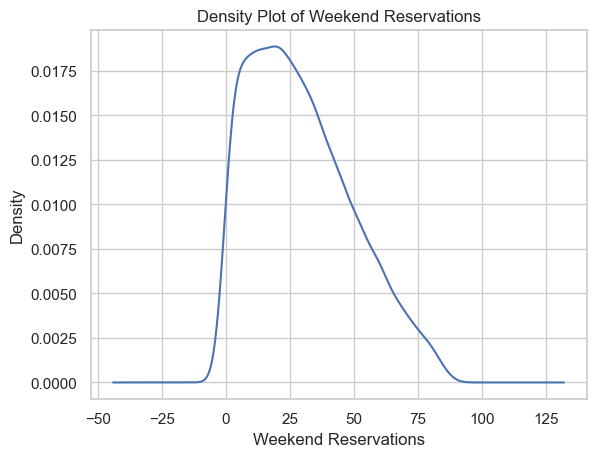

In [1226]:
df['weekend_reservations'].plot(kind='kde')
plt.title('Density Plot of Weekend Reservations')
plt.xlabel('Weekend Reservations')
plt.show()

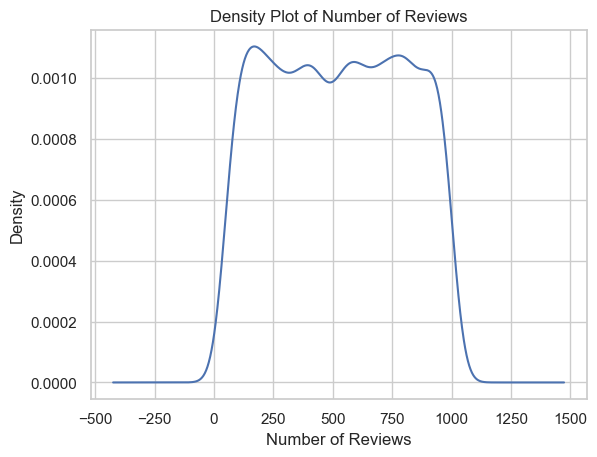

In [1227]:
df['number_of_reviews'].plot(kind='kde')
plt.title('Density Plot of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.show()

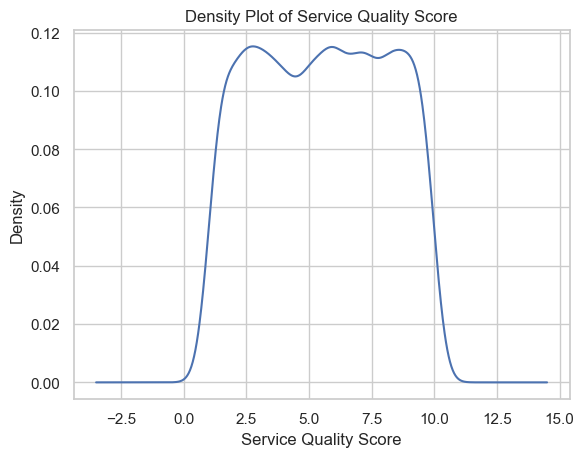

In [1228]:
df['service_quality_score'].plot(kind='kde')
plt.title('Density Plot of Service Quality Score')
plt.xlabel('Service Quality Score')
plt.show()

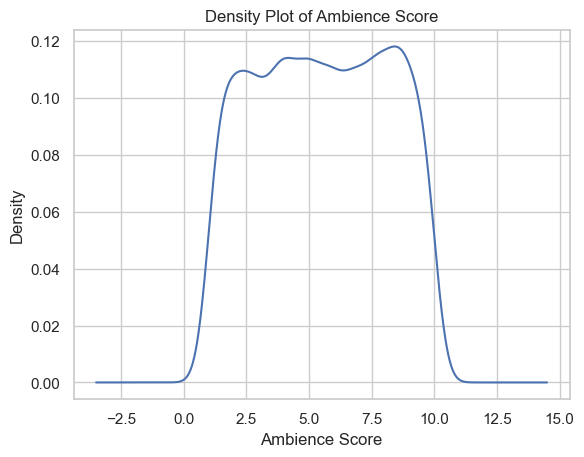

In [1229]:
df['ambience_score'].plot(kind='kde')
plt.title('Density Plot of Ambience Score')
plt.xlabel('Ambience Score')
plt.show()

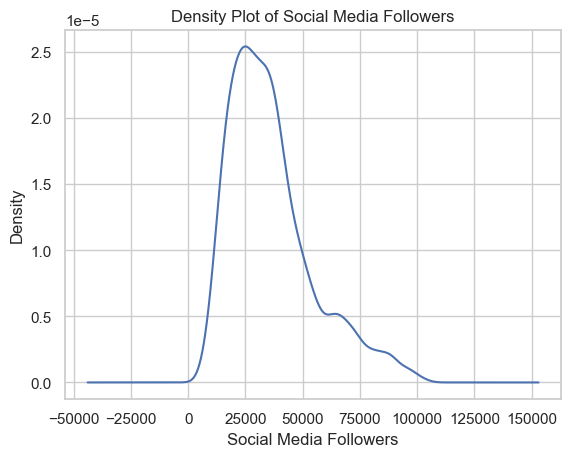

In [1230]:
df['social_media_followers'].plot(kind='kde')
plt.title('Density Plot of Social Media Followers')
plt.xlabel('Social Media Followers')
plt.show()

In [1231]:
from scipy.stats import normaltest

for i in numerical_variables:
    print(f'{i}: {"Not Gaussian" if normaltest(df[i].values,)[1]<0.05 else "Gaussian"}  {normaltest(df[i].values)}')


seating_capacity: Not Gaussian  NormaltestResult(statistic=5779.46242486545, pvalue=0.0)
average_meal_price: Not Gaussian  NormaltestResult(statistic=5158.587656104718, pvalue=0.0)
marketing_budget: Not Gaussian  NormaltestResult(statistic=1336.779205700564, pvalue=5.273315073466723e-291)
weekend_reservations: Not Gaussian  NormaltestResult(statistic=503.5528439458043, pvalue=4.5174074507386953e-110)
number_of_reviews: Not Gaussian  NormaltestResult(statistic=9031.991671735324, pvalue=0.0)
service_quality_score: Not Gaussian  NormaltestResult(statistic=7596.9623205620555, pvalue=0.0)
ambience_score: Not Gaussian  NormaltestResult(statistic=6816.168716231599, pvalue=0.0)


### Frequency of Categorical Features

In [1232]:
for i in categorical_variables:
    print(f'\n{np.round((df[i].value_counts() / df[i].value_counts().sum()) * 100,2)}')


parking_availability
Yes    50.06
No     49.94
Name: count, dtype: float64

location
Downtown    33.71
Suburban    33.28
Rural       33.01
Name: count, dtype: float64


Categorical variables distributions are balanced.

## Exploring some models

### Model Fitting

In [1233]:
model = smf.ols('revenue~seating_capacity+average_meal_price+marketing_budget+weekend_reservations+number_of_reviews+social_media_followers+service_quality_score+ambience_score+C(parking_availability)+C(location)', data=df).fit()

In [1234]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.718e+04
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:30:29   Log-Likelihood:            -1.0321e+05
No. Observations:                8368   AIC:                         2.065e+05
Df Residuals:                    8356   BIC:                         2.065e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -6.331e+05   8912.609    -71.032      0.000   -6.51e+05   -6.16e+05
C(parking_availability)[T.Yes] -1158.7217   1204.233     -0.962      0.336   -3519.316    1201.873
C(location)[T.Rural]            4066.9177   4389.407      0.927      0.354   -4537.409    1.27e+04
C(location)[T.Suburban]         4788.1937   2687.358      1.782      0.075    -479.695    1.01e+04
seating_capacity                1.068e+04    101.586    105.106      0.000    1.05e+04    1.09e+04
average_meal_price              1.318e+04     42.035    313.472      0.000    1.31e+04    1.33e+04
marketing_budget                  -1.2342      2.127     -0.580      0.562      -5.405       2.936
weekend_reservations               0.2880     33.433      0.009      0.993     -65.250      65.826
number_of_reviews                  1.7546      2.173      0.808      0.419      -2.504       6.013
social_media_followers             0.3792      0.205      1.846      0.065      -0.024       0.782
service_quality_score            161.1953    232.787      0.692      0.489    -295.125     617.515
ambience_score                   216.9851    233.815      0.928      0.353    -241.350     675.320
==============================================================================
Omnibus:                       29.797   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.318
Skew:                           0.042   Prob(JB):                     4.78e-09
Kurtosis:                       3.320   Cond. No.                     6.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Tests

#### Type 1 Anova

In [1235]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(parking_availability),1.0,7.531440e+09,7.531440e+09,2.484364,1.150206e-01
C(location),2.0,2.423692e+14,1.211846e+14,39974.656490,0.000000e+00
seating_capacity,1.0,3.234576e+13,3.234576e+13,10669.760690,0.000000e+00
average_meal_price,1.0,2.981381e+14,2.981381e+14,98345.578282,0.000000e+00
marketing_budget,1.0,1.165048e+11,1.165048e+11,38.430945,5.941523e-10
weekend_reservations,1.0,7.932573e+05,7.932573e+05,0.000262,9.870942e-01
number_of_reviews,1.0,2.028125e+09,2.028125e+09,0.669009,4.134207e-01
social_media_followers,1.0,1.032676e+10,1.032676e+10,3.406444,6.497762e-02
service_quality_score,1.0,1.455694e+09,1.455694e+09,0.480184,4.883584e-01
ambience_score,1.0,2.610827e+09,2.610827e+09,0.861223,3.534236e-01


Weekend reservations is not significant when added to a model with the other predictors.

#### Type 2 Anova

In [1236]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(parking_availability),2.806727e+09,1.0,0.925843,0.335973
C(location),1.394819e+10,2.0,2.300515,0.100271
seating_capacity,3.348989e+13,1.0,11047.169224,0.000000
average_meal_price,2.978936e+14,1.0,98264.904427,0.000000
marketing_budget,1.020345e+09,1.0,0.336577,0.561827
weekend_reservations,2.249463e+05,1.0,0.000074,0.993127
number_of_reviews,1.977274e+09,1.0,0.652235,0.419338
social_media_followers,1.032668e+10,1.0,3.406419,0.064979
service_quality_score,1.453618e+09,1.0,0.479499,0.488669
ambience_score,2.610827e+09,1.0,0.861223,0.353424


Adding Weekend Reservations, Parking Availability, Location, and Number of Reviews doesn't significantly improve the model.

#### Multicollinearity

In [1237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices #an alternative to basic pandas dfs.

y, X = dmatrices('revenue~seating_capacity+average_meal_price+marketing_budget+social_media_followers', 
                  data=df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor                features
0   27.087164               Intercept
1    1.355131        seating_capacity
2    1.001681      average_meal_price
3   41.099584        marketing_budget
4   40.400360  social_media_followers


Social media followers and marketing budget have severe multicollinearity.

#### R^2

In [1238]:
model1 = smf.ols('revenue~seating_capacity+average_meal_price+marketing_budget+number_of_reviews', data=df).fit()
model2 = smf.ols('revenue~seating_capacity+average_meal_price+marketing_budget+number_of_reviews+C(parking_availability)+C(location)', data=df).fit()

In [1239]:
print(model1.rsquared, model1.rsquared_adj)
print(model2.rsquared, model2.rsquared_adj)

0.9576099558295997 0.9575896807875477
0.9576385664597895 0.9576030963599352


Barely any difference when adding other predictors.

#### Heteroskedasticity and Transformations

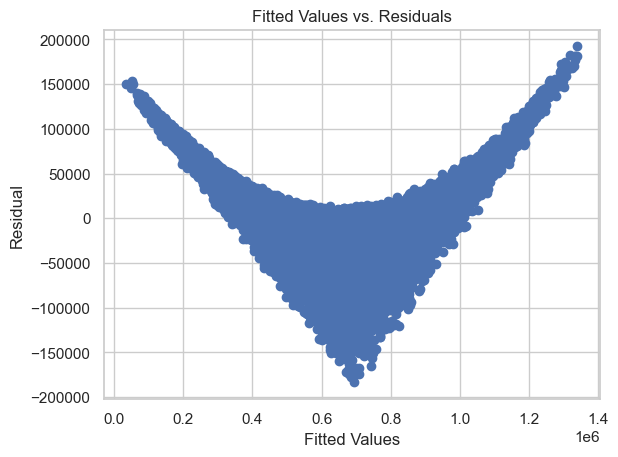

In [1240]:
p = model1.fittedvalues
res = model1.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

plt.show()

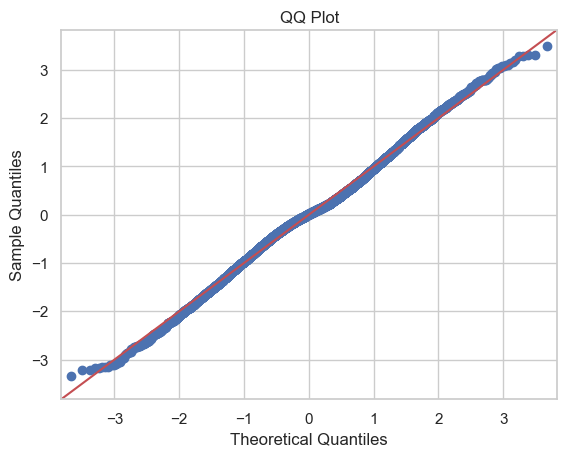

In [1241]:
sm.qqplot(res, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

We see heteroskedasticity.

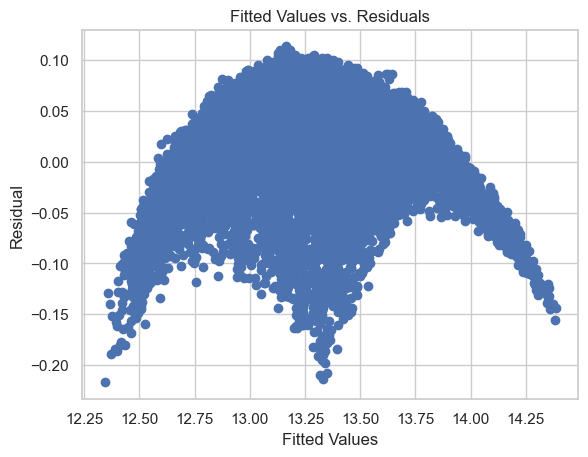

In [1242]:
model_log = smf.ols('np.log(revenue) ~ seating_capacity + average_meal_price + marketing_budget + number_of_reviews', data=df).fit()

p = model_log.fittedvalues
res = model_log.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

plt.show()

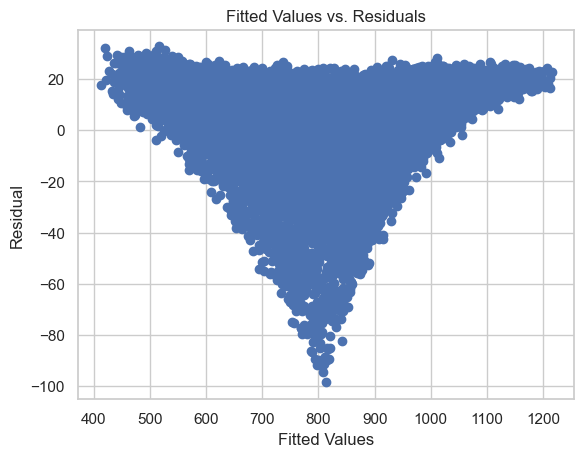

In [1243]:
model_sqrt = smf.ols('np.sqrt(revenue) ~ seating_capacity + average_meal_price + marketing_budget + number_of_reviews', data=df).fit()

p = model_sqrt.fittedvalues
res = model_sqrt.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

plt.show()

## Model Selection

### Train Test Split

In [1244]:
from sklearn.model_selection import train_test_split
model_df = df[['revenue','seating_capacity','average_meal_price','marketing_budget','weekend_reservations','number_of_reviews','social_media_followers','service_quality_score','ambience_score','parking_availability','location']]
X = model_df.drop(columns=['revenue'])
y = model_df['revenue']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sm = sm.add_constant(X_train)
X_val_sm = sm.add_constant(X_val)
train_data = pd.concat([X_train_sm, y_train], axis=1)
val_data = pd.concat([X_val_sm, y_val], axis=1)


### Fitting Model + Summary

In [1245]:
model = smf.ols('revenue~seating_capacity+average_meal_price+marketing_budget+social_media_followers+number_of_reviews+C(parking_availability)+C(location)', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 2.363e+04
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:30:29   Log-Likelihood:            -1.0321e+05
No. Observations:                8368   AIC:                         2.064e+05
Df Residuals:                    8359   BIC:                         2.065e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -6.311e+05   8746.888    -72.156      0.000   -6.48e+05   -6.14e+05
C(parking_availability)[T.Yes] -1142.3644   1203.897     -0.949      0.343   -3502.301    1217.572
C(location)[T.Rural]            4131.3060   4388.368      0.941      0.347   -4470.983    1.27e+04
C(location)[T.Suburban]         4802.8804   2686.975      1.787      0.074    -464.257    1.01e+04
seating_capacity                1.068e+04    100.171    106.604      0.000    1.05e+04    1.09e+04
average_meal_price              1.318e+04     42.027    313.538      0.000    1.31e+04    1.33e+04
marketing_budget                  -1.2314      2.127     -0.579      0.563      -5.401       2.938
social_media_followers             0.3792      0.205      1.846      0.065      -0.023       0.782
number_of_reviews                  1.7837      2.172      0.821      0.412      -2.474       6.042
==============================================================================
Omnibus:                       30.040   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.674
Skew:                           0.043   Prob(JB):                     4.00e-09
Kurtosis:                       3.322   Cond. No.                     6.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Best subset selection

In [1246]:
from itertools import combinations


def best_subset_selection(data, response, predictors):
    models = []
    
    for k in range(1, len(predictors) + 1):
        for combo in combinations(predictors, k):
            formula = f"{response} ~ {' + '.join(combo)}"
            model = smf.ols(formula, data=data).fit()
            models.append((model, combo))
    
    return models

predictors = [
    'seating_capacity', 'average_meal_price', 'marketing_budget', 'social_media_followers',
   'number_of_reviews', 'C(parking_availability)', 'C(location)'
]

In [1247]:
def calculate_metrics(model, val_data):
    y_val = val_data['revenue']
    X_val = val_data.drop('revenue', axis=1)
    
    n = len(y_val)
    k = model.df_model  # Number of predictors, excluding intercept
    
    # Make predictions
    y_pred = model.predict(X_val)
    
    # Calculate residuals
    residuals = y_val - y_pred
    
    # AIC and BIC (using the original model fit)
    aic = model.aic
    bic = model.bic
    
    # PRESS (Prediction Sum of Squares)
    press = np.sum(residuals ** 2)
    
    # R-squared for validation data
    ss_total = np.sum((y_val - np.mean(y_val)) ** 2)
    ss_residual = np.sum(residuals ** 2)
    r2 = 1 - (ss_residual / ss_total)
    
    # Adjusted R-squared for validation data
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    # Mallows' Cp
    mse = np.mean(residuals ** 2)
    cp = mse + 2 * k * (mse / n)
    
    return aic, bic, press, adj_r2, int(k), cp


In [1272]:
models = best_subset_selection(train_data, 'revenue', predictors)

len(models)


127

In [1249]:
results = []
for model, combo in models:
    aic, bic, press, adj_r2, num_predictors, cp = calculate_metrics(model, val_data)
    results.append({
        'Predictors': combo,
        'n_Predictors': num_predictors,
        'AIC': aic,
        'BIC': bic,
        'PRESS': press,
        'Adjusted R^2': adj_r2,
        'Mallows Cp': cp
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='n_Predictors').reset_index(drop=True)


In [1250]:
results_df

,Predictors,n_Predictors,AIC,BIC,PRESS,Adjusted R^2,Mallows Cp
0,"(seating_capacity,)",1,182171.769859,182185.387793,6.566794e+13,0.452342,3.927503e+10
1,"(average_meal_price,)",1,181985.880856,181999.498790,6.539596e+13,0.454611,3.911236e+10
2,"(marketing_budget,)",1,185345.567362,185359.185296,1.036809e+14,0.135322,6.201001e+10
3,"(social_media_followers,)",1,185404.048225,185417.666159,1.047150e+14,0.126698,6.262849e+10
4,"(number_of_reviews,)",1,186299.468777,186313.086711,1.199704e+14,-0.000530,7.175255e+10
...,...,...,...,...,...,...,...
122,"(average_meal_price, marketing_budget, social_...",7,170916.222418,170970.694153,1.183952e+13,0.900905,7.131743e+09
123,"(seating_capacity, average_meal_price, marketi...",7,165057.654280,165112.126015,5.357687e+12,0.955157,3.227297e+09
124,"(seating_capacity, average_meal_price, marketi...",7,165059.487076,165113.958811,5.350934e+12,0.955214,3.223229e+09
125,"(seating_capacity, average_meal_price, marketi...",7,165061.391934,165115.863669,5.354092e+12,0.955187,3.225131e+09


In [1251]:
aic_best_model = results_df[results_df['AIC'] == results_df['AIC'].min()]
print("Model selected by AIC:")
print(aic_best_model.index[0],", ".join(aic_best_model['Predictors'].iloc[0]))

bic_best_model = results_df[results_df['BIC'] == results_df['BIC'].min()]
print("\nModel selected by BIC:")
print(bic_best_model.index[0],", ".join(bic_best_model['Predictors'].iloc[0]))

adj_r2_best_model = results_df[results_df['Adjusted R^2'] == results_df['Adjusted R^2'].max()]
print("\nModel selected by Adjusted R^2:")
print(adj_r2_best_model.index[0],", ".join(adj_r2_best_model['Predictors'].iloc[0]))

press_best_model = results_df[results_df['PRESS'] == results_df['PRESS'].min()]
print("\nModel selected by PRESS:")
print(press_best_model.index[0],", ".join(press_best_model['Predictors'].iloc[0]))    

cp_best_model = results_df[results_df['Mallows Cp'] == results_df['Mallows Cp'].min()]
print("\nModel selected by Mallows' Cp:")
print(cp_best_model.index[0], ", ".join(cp_best_model['Predictors'].iloc[0]))


Model selected by AIC:
111 seating_capacity, average_meal_price, social_media_followers, C(parking_availability), C(location)

Model selected by BIC:
42 seating_capacity, average_meal_price, social_media_followers

Model selected by Adjusted R^2:
19 seating_capacity, average_meal_price

Model selected by PRESS:
117 seating_capacity, average_meal_price, marketing_budget, number_of_reviews, C(location)

Model selected by Mallows' Cp:
19 seating_capacity, average_meal_price


Given that we are interested in the effects of specific predictors on revenue, I will choose the model selected by BIC (revenue ~ seating_capacity + average_meal_price + social_media_followers). BIC penalizes more complex models more heavily than AIC. BIC is preferred when a false positive is more costly than a false negative. Due to the fact that the two categorical variables, parking availability and location, were not significant in the full model ANOVA test, I will remove them from the model. 

## Model Testing

In [1252]:
model = smf.ols('revenue~seating_capacity+average_meal_price+social_media_followers', data=model_df).fit()

In [1273]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 6.300e+04
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:12:19   Log-Likelihood:            -1.0322e+05
No. Observations:                8368   AIC:                         2.064e+05
Df Residuals:                    8364   BIC:                         2.065e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -6.215e+05   3001.977   -207.037      0.000   -6.27e+05   -6.16e+05
seating_capacity         1.06e+04     39.883    265.836      0.000    1.05e+04    1.07e+04
average_meal_price      1.317e+04     42.005    313.647      0.000    1.31e+04    1.33e+04
social_media_followers     0.2258      0.037      6.065      0.000       0.153       0.299
==============================================================================
Omnibus:                       27.849   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.650
Skew:                           0.006   Prob(JB):                     1.10e-08
Kurtosis:                       3.324   Cond. No.                     2.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Testing Normality

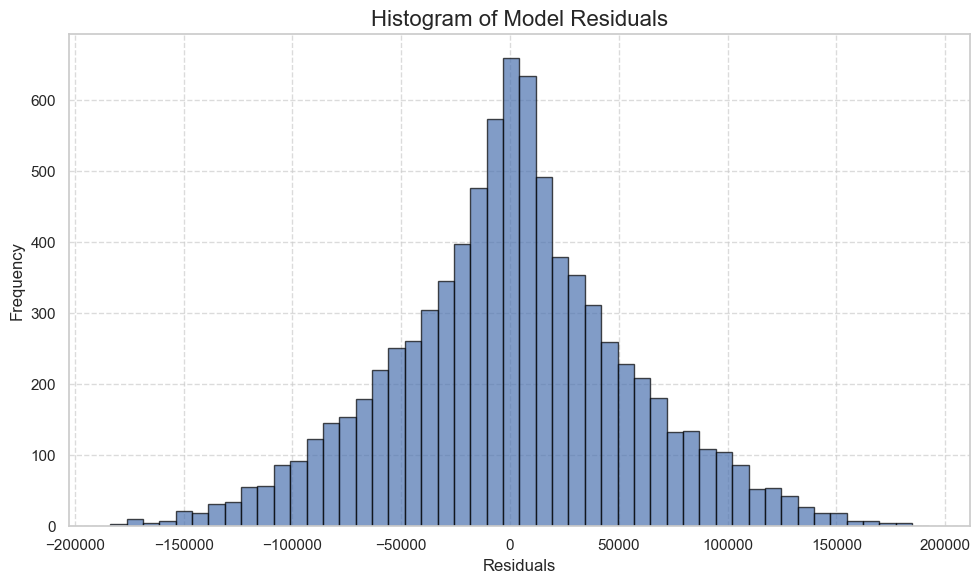

In [1277]:
plt.figure(figsize=(10, 6))
plt.hist(model.resid, bins=50, edgecolor='black', alpha=0.7)
plt.title('Histogram of Model Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

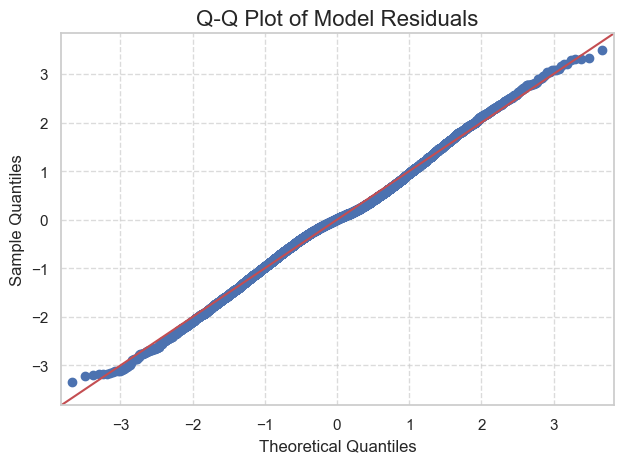

In [1278]:
plt.figure(figsize=(10, 6))
sm.qqplot(model.resid/np.std(model.resid), line='45')
plt.title('Q-Q Plot of Model Residuals', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

These two plots suggest that the residuals are almost normal, but we do see slight heavy tails. This is not a major concern but suggests that the significant of our subsequent tests may not be completely reliable.

#### Plotting Fitted Values vs Residuals



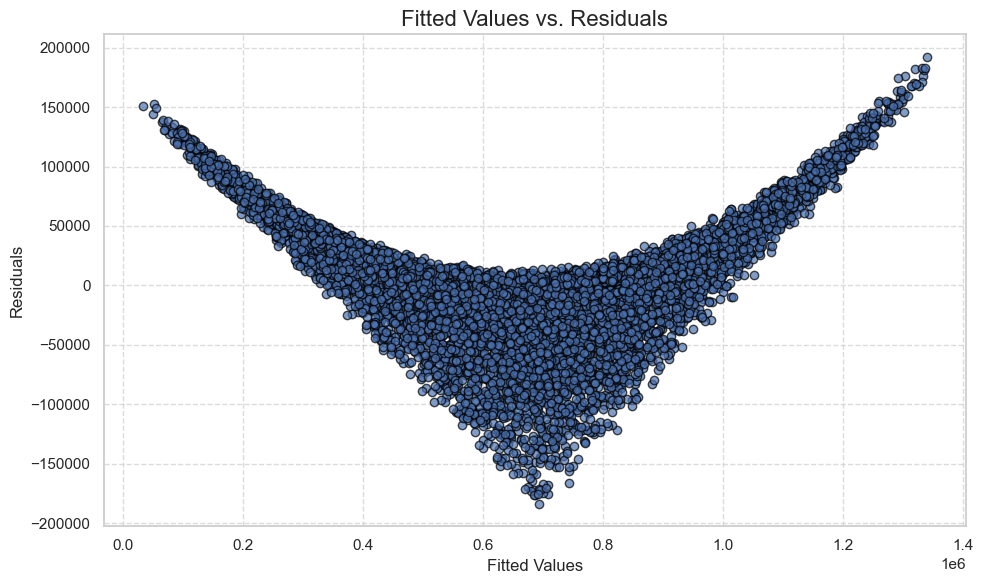

In [1279]:
p = model.fittedvalues
res = model.resid

plt.figure(figsize=(10, 6))
plt.scatter(p, res, alpha=0.7, edgecolor='black')
plt.xlabel("Fitted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Fitted Values vs. Residuals", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This plot is concerning because the residuals are not evenly distributed around 0. This suggests that the variance of the residuals is not constant, so we may have heteroskedasticity. Therefore, we will try to transform the response variabl, revenue to stabilize the variance.

#### Transformations

In [1256]:
model_df['log_revenue'] = np.log(model_df['revenue'])
log_model = smf.ols('log_revenue~seating_capacity+average_meal_price+social_media_followers', data=model_df).fit()


/var/folders/z0/f_81q7kj32b00k_1vkb513480000gn/T/ipykernel_39488/2846656889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['log_revenue'] = np.log(model_df['revenue'])


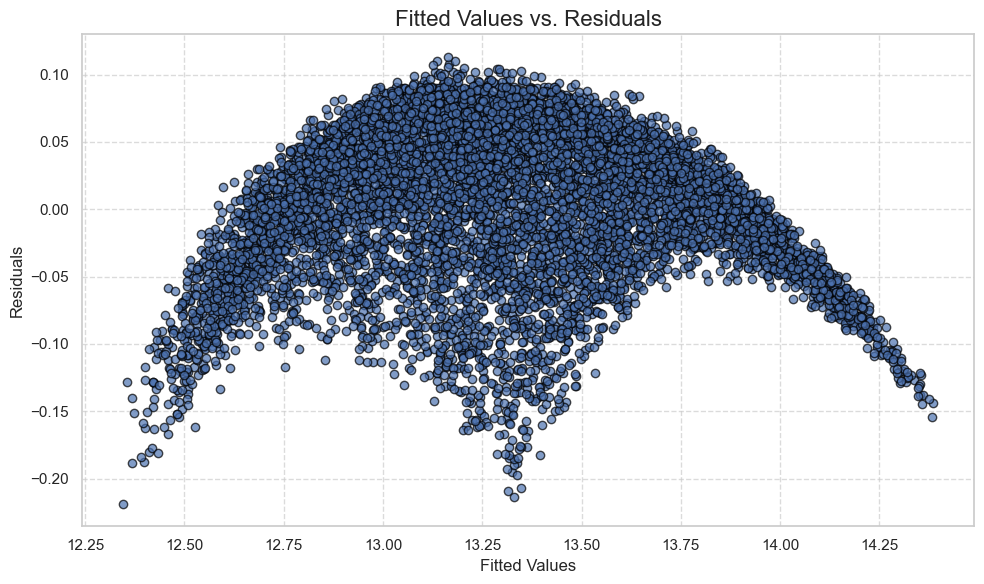

In [1280]:
p = log_model.fittedvalues
res = log_model.resid

plt.figure(figsize=(10, 6))
plt.scatter(p, res, alpha=0.7, edgecolor='black')
plt.xlabel("Fitted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Fitted Values vs. Residuals", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We still see heteroskedasticity. Let's try taking the square root of the response variable, revenue.

In [1258]:
model_df['sqrt_revenue'] = np.sqrt(model_df['revenue'])
sqrt_model = smf.ols('sqrt_revenue~seating_capacity+average_meal_price+social_media_followers', data=model_df).fit()

/var/folders/z0/f_81q7kj32b00k_1vkb513480000gn/T/ipykernel_39488/3620221217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['sqrt_revenue'] = np.sqrt(model_df['revenue'])


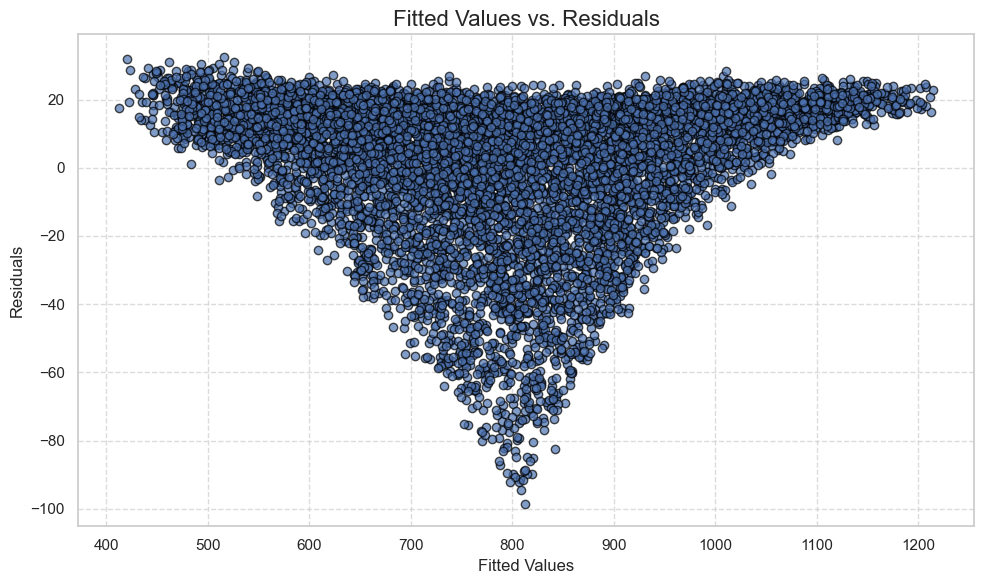

In [1281]:
p = sqrt_model.fittedvalues
res = sqrt_model.resid

plt.figure(figsize=(10, 6))
plt.scatter(p, res, alpha=0.7, edgecolor='black')
plt.xlabel("Fitted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Fitted Values vs. Residuals", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [1260]:
model_df['log_seating_capacity'] = np.log(model_df['seating_capacity'])
model_df['log_average_meal_price'] = np.log(model_df['average_meal_price'])
model_df['log_social_media_followers'] = np.log(model_df['social_media_followers'])


log_model_2 = smf.ols('log_revenue~log_seating_capacity+average_meal_price+log_social_media_followers', data=model_df).fit()

/var/folders/z0/f_81q7kj32b00k_1vkb513480000gn/T/ipykernel_39488/283158589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['log_seating_capacity'] = np.log(model_df['seating_capacity'])
/var/folders/z0/f_81q7kj32b00k_1vkb513480000gn/T/ipykernel_39488/283158589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['log_average_meal_price'] = np.log(model_df['average_meal_price'])
/var/folders/z0/f_81q7kj32b00k_1vkb513480000gn/T/ipykernel_39488/283158589.py:3: SettingWithCopyWarning: 
A va

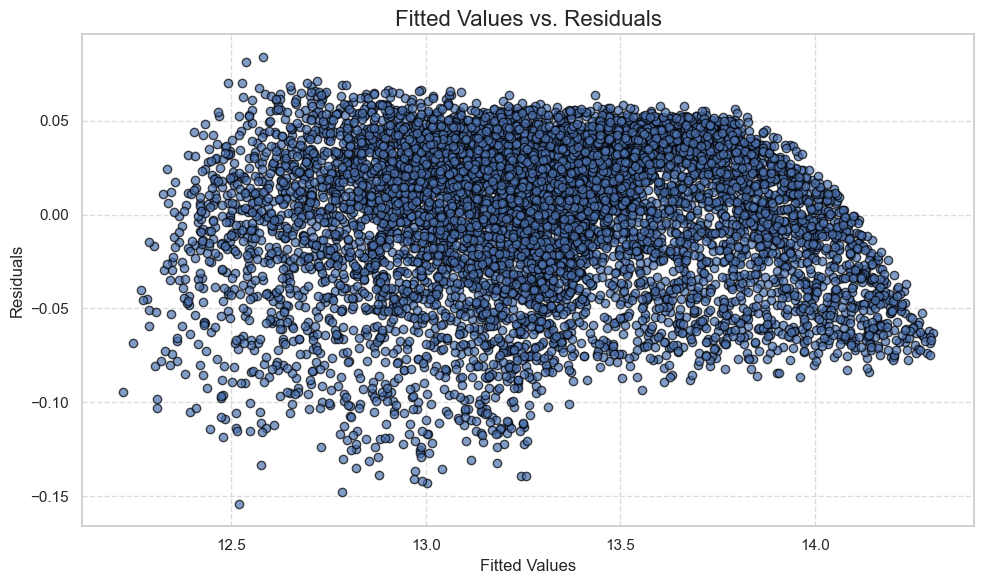

In [1282]:
p = log_model_2.fittedvalues
res = log_model_2.resid

plt.figure(figsize=(10, 6))
plt.scatter(p, res, alpha=0.7, edgecolor='black')
plt.xlabel("Fitted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Fitted Values vs. Residuals", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

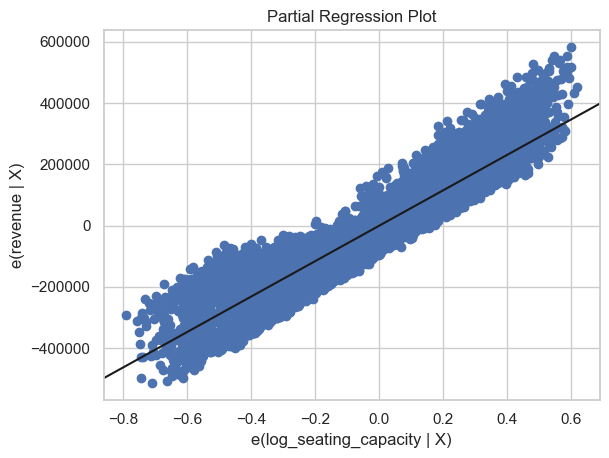

In [1285]:
# Testing linear relationship between response and predictors
sm.graphics.plot_partregress('revenue', 'log_seating_capacity', ['average_meal_price','social_media_followers'], data=model_df, obs_labels=False);

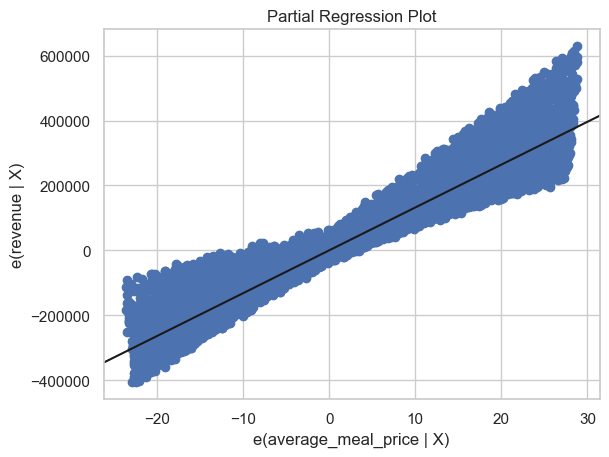

In [1286]:
sm.graphics.plot_partregress('revenue', 'average_meal_price', ['log_seating_capacity','social_media_followers'], data=model_df, obs_labels=False);

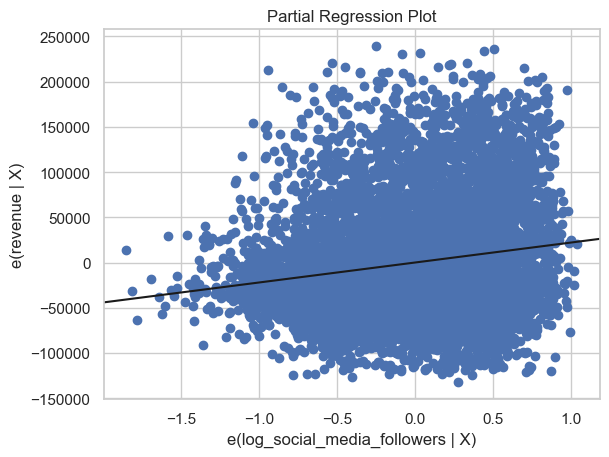

In [1264]:
sm.graphics.plot_partregress('revenue', 'log_social_media_followers', ['log_seating_capacity','average_meal_price'], data=model_df, obs_labels=False);

The distribution of the residuals is more even when we take the log of social media followers, seating capacity, and revenue. Therefore, the heteroskedasticity has been reduced. However, the relationship between social media followers and revenue is not linear. After trying to address this by applying different transformations to this predictor, we were unable to find one that sufficiently addresses the non-linearity. Therefore, we will leave the model as is.

### VIF

In [1265]:
y, X = dmatrices('revenue~seating_capacity+average_meal_price+social_media_followers', 
                  data=model_df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor                features
0   24.875408               Intercept
1    1.329080        seating_capacity
2    1.000928      average_meal_price
3    1.328021  social_media_followers


Our VIF factors are low (around 1), so multicollinearity is not an issue. It is likely that social media followers and marketing budget are correlated, as was suggested by the correlation matrix. However, marketing budget was not selected by BIC, so it is not a factor. 

### Outliers, Leverage, and Influence

In [1266]:
infl = log_model_2.get_influence()

##### Thresholding externally studentized residuals

In [1267]:
import scipy
n = len(model_df)
p = log_model_2.df_model

tstar = scipy.stats.t.ppf(.975, n - p - 1)
reg_studs = infl.resid_studentized_external
atyp_studs = np.abs(reg_studs) > tstar

len(atyp_studs[atyp_studs==True])

355

##### Thresholding Cook's Distance

In [1268]:
inflsum = infl.summary_frame()
reg_cook = inflsum.cooks_d
atyp_cook = np.abs(reg_cook) >= 4/n
len(atyp_cook[atyp_cook==True])

621

##### Thresholding Leverage

In [1269]:
leverage = infl.hat_matrix_diag
atyp_leverage = np.abs(leverage) > 2*p/n
len(atyp_leverage[atyp_leverage==True])

1197

##### Excluding these points and refitting the model

In [1270]:
log_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_revenue   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.027e+05
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:30:41   Log-Likelihood:                 15209.
No. Observations:                8368   AIC:                        -3.041e+04
Df Residuals:                    8364   BIC:                        -3.038e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      8.3317      0.009    916.923      0.000       8.314       8.350
log_seating_capacity           0.9598      0.002    622.721      0.000       0.957       0.963
average_meal_price             0.0202      3e-05    672.746      0.000       0.020       0.020
log_social_media_followers     0.0119      0.001     12.842      0.000       0.010       0.014
==============================================================================
Omnibus:                      682.956   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.377
Skew:                          -0.787   Prob(JB):                    2.01e-188
Kurtosis:                       3.054   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1271]:
new_df = model_df[~atyp_studs & ~atyp_cook & ~atyp_leverage]
new_model = smf.ols('log_revenue~log_seating_capacity+average_meal_price+log_social_media_followers', data=new_df).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_revenue   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.129e+05
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:30:41   Log-Likelihood:                 13918.
No. Observations:                6836   AIC:                        -2.783e+04
Df Residuals:                    6832   BIC:                        -2.780e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      8.3298      0.009    920.087      0.000       8.312       8.348
log_seating_capacity           0.9582      0.002    613.675      0.000       0.955       0.961
average_meal_price             0.0201   2.97e-05    676.444      0.000       0.020       0.020
log_social_media_followers     0.0137      0.001     14.046      0.000       0.012       0.016
==============================================================================
Omnibus:                      477.500   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.038
Skew:                          -0.596   Prob(JB):                    7.03e-104
Kurtosis:                       2.502   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There isn't actually much of a change in our model statistics and coefficients, so we will leave the model as is.